In [7]:
import d2l.torch
from torch.utils.data import Dataset
import torch
import torch.nn as nn

from more import train
from more.datasets import ModulationDataSets, load_data_mnist
from more.network import MoreNet, init_weights
from more.train import train_center
from utils.centerloss import CenterLoss
from utils import get_out_path
import datetime
import time
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# %%

ModuleNotFoundError: No module named 'utils'

In [4]:
train_path = r'E:\train.h5'
test_path = r'E:\test.h5'
train_dataset = ModulationDataSets(train_path)
test_dataset = ModulationDataSets(test_path)
label_name = train_dataset.get_labels_name()
num_classes = train_dataset.get_numclasses()
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True,
    num_workers=0, drop_last=False)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=True,
    num_workers=0, drop_last=False)
# train_loader, test_loader = load_data_mnist(128, (196, 64))
# %%

NameError: name 'ModulationDataSets' is not defined

In [6]:
net = MoreNet()
X = torch.rand(size=(1, 1, 195, 64), dtype=torch.float32)
net(X, True)
# %%

(tensor([[-0.0199,  0.0139]]),
 tensor([[0.0625, 0.0661, 0.1207, 0.1214, 0.1938, 0.0824, 0.1539, 0.1991]],
        grad_fn=<SoftmaxBackward0>))

In [7]:
# net.load_state_dict(torch.load('basic-8.parm'))
# %%

In [8]:
# torch.save(net.state_dict(),"basic-8.parm")
# %%

In [9]:
init_weights(net)
# %%

In [10]:
loss = nn.CrossEntropyLoss()
center_loss = CenterLoss(num_classes=num_classes, feat_dim=2, use_gpu=True)
lr = 0.001
lr_center = 0.5
opt_model = torch.optim.SGD(net.parameters(), lr, weight_decay=5e-04, momentum=0.9)
opt_center = torch.optim.SGD(center_loss.parameters(), lr_center)

scheduler = torch.optim.lr_scheduler.StepLR(opt_model, step_size=20, gamma=0.5)

net = net.to("cuda:0")
# %%

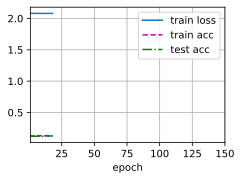

In [ ]:
#%matplotlib
start_time = time.time()
train.train_ch6(net, train_loader, test_loader, 150, 0.01, "cuda:0")
elapsed = round(time.time() - start_time)
elapsed = str(datetime.timedelta(seconds=elapsed))
print("Finished. Total elapsed time (h:m:s): {}".format(elapsed))
# %%

In [ ]:
torch.save(net.state_dict(), "more/basic-basic.parm")
# %%
